<a href="https://colab.research.google.com/github/D1N3SH-DEV/spotify_review_analysis/blob/main/Spotify_User_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd

data = pd.read_csv('DATASET.csv')
data.head()

,Review,label
0,"Great music service, the audio is high quality...",POSITIVE
1,Please ignore previous negative rating. This a...,POSITIVE
2,"This pop-up ""Get the best Spotify experience o...",NEGATIVE
3,Really buggy and terrible to use as of recently,NEGATIVE
4,Dear Spotify why do I get songs that I didn't ...,NEGATIVE


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52702 entries, 0 to 52701
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  52686 non-null  object
 1   label   52702 non-null  object
dtypes: object(2)
memory usage: 823.6+ KB


Data Cleaning:

* Convert to lowercase: Ensures uniformity, as "Spotify" and "spotify" would be treated the same.
* Remove punctuation: Keeps words without any punctuation marks.
* Remove extra whitespace: Removes unnecessary spaces between words.

In [12]:
import re

# Step 1: Remove unnecessary characters and make text lowercase
def clean_text(text):
    # Handle potential float values (NaN) by converting them to empty strings
    if isinstance(text, float):
        text = str(text)  # Convert to string
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespaces
    return text

# Apply the cleaning function to the 'Review' column
data['Cleaned_Review'] = data['Review'].apply(clean_text)

# Display the cleaned dataset
data[['Review', 'Cleaned_Review', 'label']]

,Review,Cleaned_Review,label
0,"Great music service, the audio is high quality...",great music service the audio is high quality ...,POSITIVE
1,Please ignore previous negative rating. This a...,please ignore previous negative rating this ap...,POSITIVE
2,"This pop-up ""Get the best Spotify experience o...",this popup get the best spotify experience on ...,NEGATIVE
3,Really buggy and terrible to use as of recently,really buggy and terrible to use as of recently,NEGATIVE
4,Dear Spotify why do I get songs that I didn't ...,dear spotify why do i get songs that i didnt p...,NEGATIVE
...,...,...,...
52697,Yes the best,yes the best,POSITIVE
52698,Spotify won my heart in Feb 2024 You won my he...,spotify won my heart in feb 2024 you won my he...,POSITIVE
52699,I tried to open the app and it wont open I res...,i tried to open the app and it wont open i res...,POSITIVE
52700,Good,good,POSITIVE


Text Preprocessing:

* Tokenization: Split reviews into individual words (tokens).
* Stop Words Removal: Remove common words that don’t add much meaning (e.g., "the," "is," "and").
* Lemmatization/Stemming: Reduce words to their base form, like “playing” to “play.”

In [13]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [14]:
# Download required NLTK data (only need to run these once)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [16]:
# Initialize stop words and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to preprocess text
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stop words and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    # Join tokens back into a single string
    return ' '.join(tokens)

# Apply preprocessing to the 'Cleaned_Review' column
data['Processed_Review'] = data['Cleaned_Review'].apply(preprocess_text)

# Display the processed dataset
data[['Review', 'Cleaned_Review', 'Processed_Review', 'label']]

,Review,Cleaned_Review,Processed_Review,label
0,"Great music service, the audio is high quality...",great music service the audio is high quality ...,great music service audio high quality app eas...,POSITIVE
1,Please ignore previous negative rating. This a...,please ignore previous negative rating this ap...,please ignore previous negative rating app sup...,POSITIVE
2,"This pop-up ""Get the best Spotify experience o...",this popup get the best spotify experience on ...,popup get best spotify experience android 12 a...,NEGATIVE
3,Really buggy and terrible to use as of recently,really buggy and terrible to use as of recently,really buggy terrible use recently,NEGATIVE
4,Dear Spotify why do I get songs that I didn't ...,dear spotify why do i get songs that i didnt p...,dear spotify get song didnt put playlist shuff...,NEGATIVE
...,...,...,...,...
52697,Yes the best,yes the best,yes best,POSITIVE
52698,Spotify won my heart in Feb 2024 You won my he...,spotify won my heart in feb 2024 you won my he...,spotify heart feb 2024 heart music lyric langu...,POSITIVE
52699,I tried to open the app and it wont open I res...,i tried to open the app and it wont open i res...,tried open app wont open restarted phone ill t...,POSITIVE
52700,Good,good,good,POSITIVE


Exploratory Data Analysis (EDA):

Analyze word frequency to understand commonly used words for each label.
Visualizations: Use word clouds or bar charts to visualize the most frequent words for each sentiment.

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

<ipython-input-24-9cafa6ab1b2a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=data, palette='viridis')


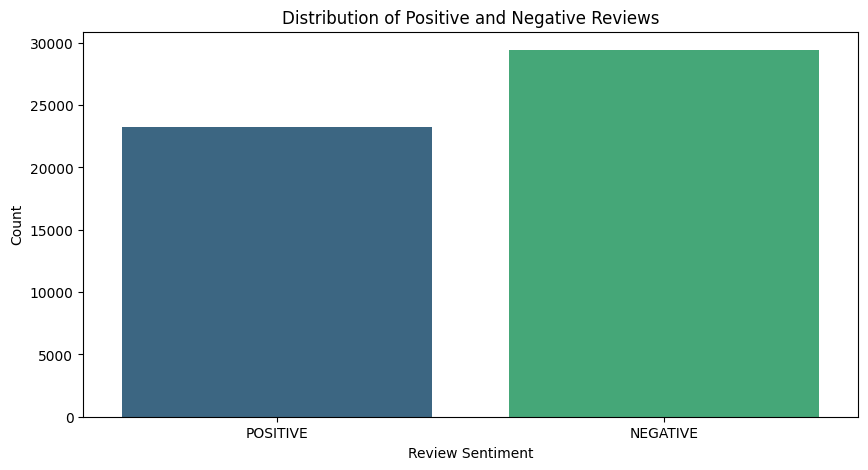

<ipython-input-24-9cafa6ab1b2a>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Word', data=top_positive_df, ax=ax3, palette='Greens')
<ipython-input-24-9cafa6ab1b2a>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Word', data=top_negative_df, ax=ax4, palette='Reds')


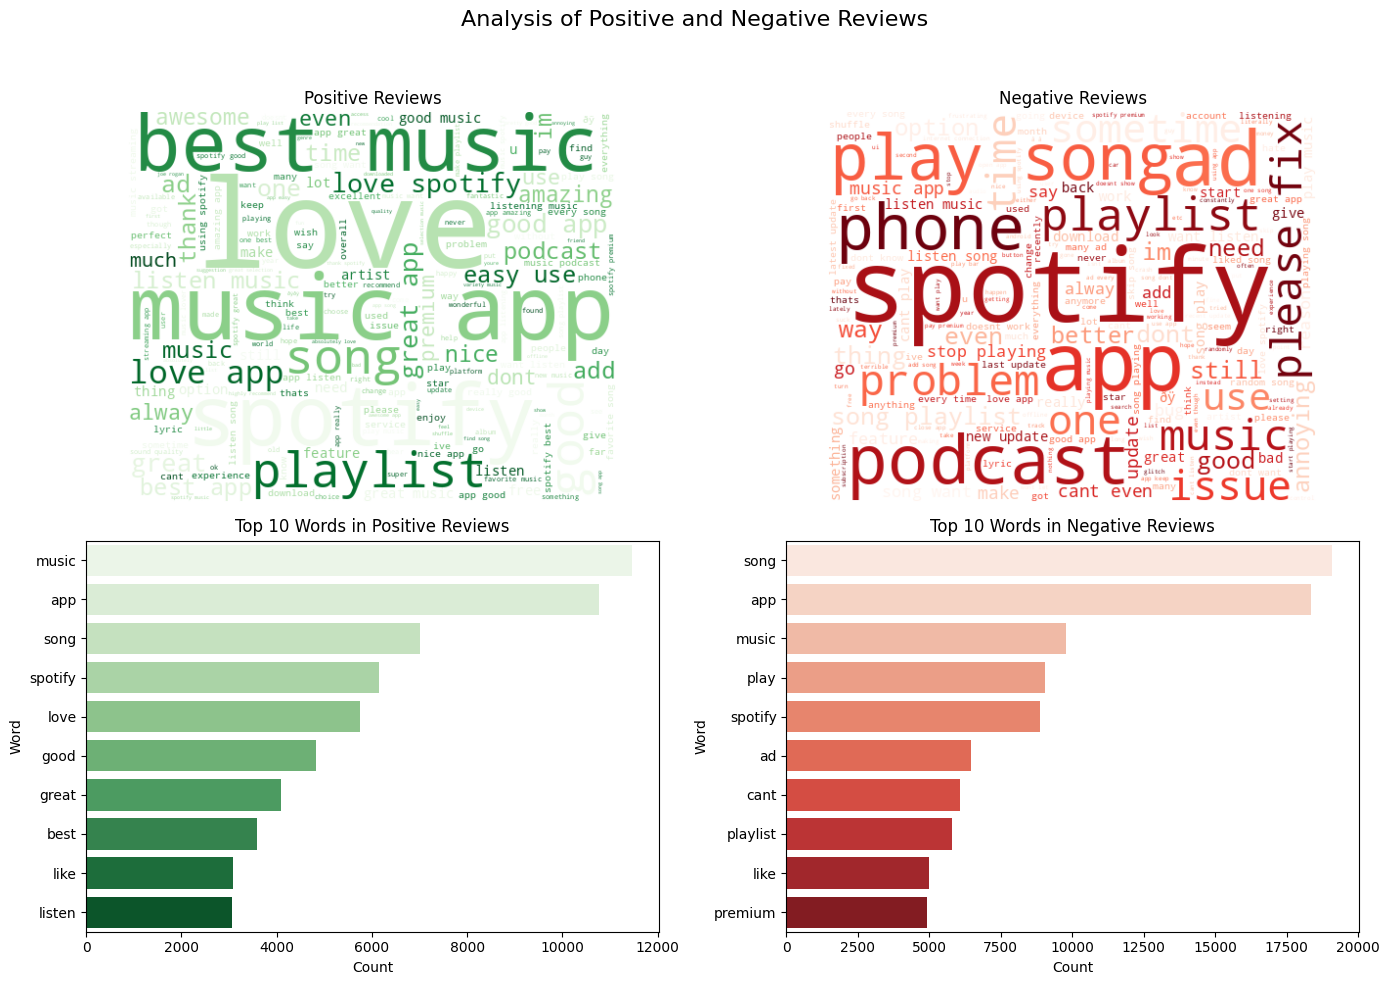

In [24]:
# Plot the distribution of positive and negative reviews
plt.figure(figsize=(10, 5))
sns.countplot(x='label', data=data, palette='viridis')
plt.title('Distribution of Positive and Negative Reviews')
plt.xlabel('Review Sentiment')
plt.ylabel('Count')
plt.show()

# Generate word clouds for each label
positive_reviews = ' '.join(data[data['label'] == 'POSITIVE']['Processed_Review'])
negative_reviews = ' '.join(data[data['label'] == 'NEGATIVE']['Processed_Review'])

# Set up the figure layout for word clouds and count plots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Analysis of Positive and Negative Reviews', fontsize=16)

# Positive reviews word cloud
wordcloud_positive = WordCloud(width=500, height=400, background_color='white', colormap='Greens').generate(positive_reviews)
ax1.imshow(wordcloud_positive, interpolation='bilinear')
ax1.axis('off')
ax1.set_title('Positive Reviews')

# Negative reviews word cloud
wordcloud_negative = WordCloud(width=500, height=400, background_color='white', colormap='Reds').generate(negative_reviews)
ax2.imshow(wordcloud_negative, interpolation='bilinear')
ax2.axis('off')
ax2.set_title('Negative Reviews')

# Count top 10 words for positive reviews
positive_word_counts = Counter(positive_reviews.split())
top_positive_words = positive_word_counts.most_common(10)
top_positive_df = pd.DataFrame(top_positive_words, columns=['Word', 'Count'])

# Count plot for top 10 words in positive reviews
sns.barplot(x='Count', y='Word', data=top_positive_df, ax=ax3, palette='Greens')
ax3.set_title('Top 10 Words in Positive Reviews')

# Count top 10 words for negative reviews
negative_word_counts = Counter(negative_reviews.split())
top_negative_words = negative_word_counts.most_common(10)
top_negative_df = pd.DataFrame(top_negative_words, columns=['Word', 'Count'])

# Count plot for top 10 words in negative reviews
sns.barplot(x='Count', y='Word', data=top_negative_df, ax=ax4, palette='Reds')
ax4.set_title('Top 10 Words in Negative Reviews')

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit title
plt.show()

* Sentiment Distribution Plot: Shows counts of positive vs. negative reviews.
* Word Clouds:
  * Separate clouds for positive and negative reviews, using distinct color schemes.
  * Adjustments for a clean layout and alignment.

Feature Engineering:

* Vectorization: Convert text data into numerical form using methods like TF-IDF or word embeddings (e.g., Word2Vec, BERT).
* Sentiment Analysis: Use sentiment scores if you want more detailed sentiment breakdowns.

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=1000)  # Limit to top 1000 features to reduce dimensionality

# Apply TF-IDF to the 'Processed_Review' column
X = tfidf.fit_transform(data['Processed_Review']).toarray()

# Display the shape of the feature matrix and sample features
print(f"Shape of TF-IDF matrix: {X.shape}")
print("Sample TF-IDF Features:", tfidf.get_feature_names_out()[:10])  # Display first 10 feature names for reference

# Prepare the labels
y = data['label'].apply(lambda x: 1 if x == 'POSITIVE' else 0).values  # Convert labels to binary format

# Optional: Check the first few entries of the transformed data
print(X[:5])
print(y[:5])

Shape of TF-IDF matrix: (52702, 1000)
Sample TF-IDF Features: ['10' '100' '1010' '12' '15' '20' '2022' '23' '30' '50']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[1 1 0 0 0]


* TF-IDF Vectorization: Converts the processed reviews into a matrix of numerical features, with each column representing a word (feature) and each row a review.
* Binary Label Conversion: Converts "POSITIVE" to 1 and "NEGATIVE" to 0, making it ready for binary classification models.

Classification Model: Train a model to classify the reviews into "POSITIVE" or "NEGATIVE" using algorithms like Logistic Regression, Naive Bayes, or even neural networks like LSTM or BERT.
* Evaluate with metrics such as accuracy, precision, recall, and F1 score.

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display evaluation results
print("Model Performance:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Confusion Matrix and Classification Report
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Model Performance:
Accuracy: 0.88
Precision: 0.87
Recall: 0.86
F1 Score: 0.86

Confusion Matrix:
[[5294  612]
 [ 665 3970]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.90      0.89      5906
           1       0.87      0.86      0.86      4635

    accuracy                           0.88     10541
   macro avg       0.88      0.88      0.88     10541
weighted avg       0.88      0.88      0.88     10541



* Train-Test Split: Divides the dataset into training and testing subsets (80% training, 20% testing).
* Model Training: Fits the Logistic Regression model to the training data.
* Prediction & Evaluation:
  * Calculates Accuracy, Precision, Recall, and F1 Score.
  * Displays a Confusion Matrix to analyze the classification results.
  * Outputs a Classification Report to provide a breakdown of metrics per class.

Model Interpretation:
* Accuracy: This is the percentage of correct predictions (positive or negative) out of all predictions. Higher accuracy suggests better performance, but it should be considered along with other metrics, especially if classes are imbalanced.
* Precision: Precision for "positive" reviews measures the percentage of correctly predicted positive reviews out of all reviews predicted as positive. High precision means fewer false positives.
* Recall: Recall for "positive" reviews indicates the percentage of actual positive reviews that were correctly identified. High recall means fewer false negatives.
* F1 Score: The F1 score is a balance between precision and recall. A high F1 score shows a good balance, especially when one metric (precision or recall) is lower than the other.
* Confusion Matrix: Shows the counts of true positives, true negatives, false positives, and false negatives, offering insight into where the model may be making errors.

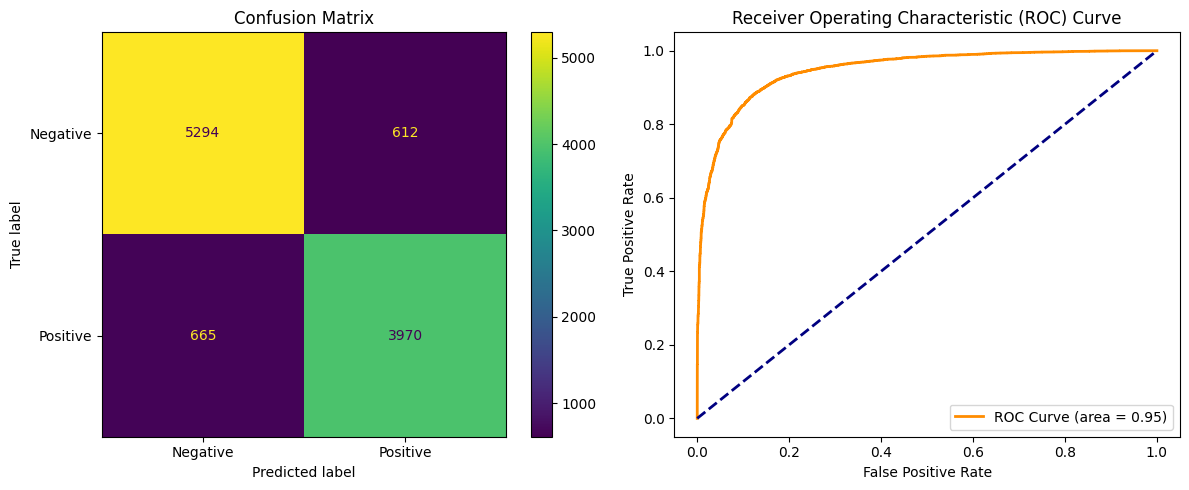

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, ConfusionMatrixDisplay

# Create a figure with 1 row and 2 columns for the subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Confusion Matrix Visualization
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=["Negative", "Positive"], cmap="viridis", ax=axs[0])
axs[0].set_title("Confusion Matrix")

# ROC Curve and AUC (Area Under Curve)
y_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for positive class
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

axs[1].plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC Curve (area = {roc_auc:.2f})")
axs[1].plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")  # Diagonal line for reference
axs[1].set_xlabel("False Positive Rate")
axs[1].set_ylabel("True Positive Rate")
axs[1].set_title("Receiver Operating Characteristic (ROC) Curve")
axs[1].legend(loc="lower right")

plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()

Confusion Matrix:

A graphical representation that shows true positives, true negatives, false positives, and false negatives.
The diagonal elements represent correct predictions, and off-diagonal elements indicate misclassifications.
ROC Curve:

Plots the true positive rate (recall) against the false positive rate.
The area under the curve (AUC) quantifies overall model performance; closer to 1.0 is ideal, showing strong distinction between classes.